# DIP A-3 2019040

## Q1 Filtering in Fourier Domain

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def get_box_filter(n):
    
    return np.ones((n,n))/(n*n)

def pad_img(image, new_size):

    one_side_pad = (new_size-image.shape[0])

    new_image = cv2.copyMakeBorder(image,0,one_side_pad,0,one_side_pad,cv2.BORDER_CONSTANT,None,value=0)
    
    return new_image

def pad_filter(filt, new_size):

    one_side_pad = (new_size-filt.shape[0])

    new_filt = cv2.copyMakeBorder(filt,0,one_side_pad,0,one_side_pad,cv2.BORDER_CONSTANT,None,value=0)
    
    return new_filt

In [2]:
path = "/home/hardeekh/Desktop/IIIT/Semester 5 (Monsoon 2021)/DIP/A-3/"
name="x5.bmp"
img = cv2.imread(path+name,0)
N = img.shape[0] 
M = img.shape[1]

## define filter
Di = [10,30,60]
filt = [np.ones((N,M)), np.ones((N,M)), np.ones((N,M))]

for k in range(3):
    for i in range(N):
        for j in range(M):
            D = np.sqrt((i-N/2)**2 + (j-M/2)**2)
            filt[k][i,j] = 1/(1+(D/Di[k])**4)

## zero pad
new_size = 2*N
padded_img = np.copy(img)
pdi_copy = pad_img(np.copy(img),2*N)
padded_filt = filt

## multiply image by (-1)^(m+n)
for i in range(padded_img.shape[0]):
    for j in range(padded_img.shape[1]):
        padded_img[i,j]=padded_img[i,j]*((-1)**(i+j))
                
## compute 2d DFT
img_dft = np.fft.fft2(padded_img)
filt_dft = (padded_filt)

## multiply elementwise
mult_res = [np.multiply(img_dft,filt_dft[i]) for i in range(3)]

## take real part of IDFT
conv_via_dft = [np.real(np.fft.ifft2(mult_res[0])), np.real(np.fft.ifft2(mult_res[1])), np.real(np.fft.ifft2(mult_res[2]))]

## inverse centering

for i in range(padded_img.shape[0]):
    for j in range(padded_img.shape[1]):
        conv_via_dft[0][i,j]=conv_via_dft[0][i,j]*((-1)**(i+j))
        conv_via_dft[1][i,j]=conv_via_dft[1][i,j]*((-1)**(i+j))
        conv_via_dft[2][i,j]=conv_via_dft[2][i,j]*((-1)**(i+j))

In [3]:
## display images

cv2.imwrite("input_img.bmp",img)
cv2.imwrite("padded_input_img.bmp",pdi_copy)
cv2.imwrite("D0_10.bmp",conv_via_dft[0])
cv2.imwrite("D0_30.bmp",conv_via_dft[1])
cv2.imwrite("D0_60.bmp",conv_via_dft[2])

#cv2.imwrite("out_eq.bmp",conv_via_dft)

a0=cv2.imread(path+"input_img.bmp",0)
a1=cv2.imread(path+"padded_input_img.bmp",0)
a=cv2.imread(path+"D0_10.bmp",0)
b=cv2.imread(path+"D0_30.bmp",0)
c=cv2.imread(path+"D0_60.bmp",0)

cv2.imshow("input_img",a0)
cv2.imshow("padded_input_img",a1)
cv2.imshow("D0_10",a)
cv2.imshow("D0_30",b)
cv2.imshow("D0_60",c)
cv2.waitKey(0)
cv2.destroyAllWindows()

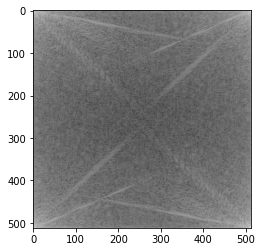

In [3]:
## magnitude spectrum of zero padded input image
f = np.fft.fft2(pdi_copy)
ms1 = 20*np.log(np.abs(f)+1)
plt.imshow(ms1,cmap="gray")

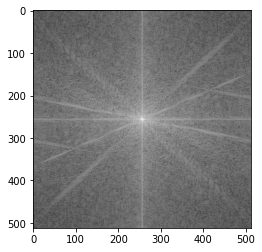

In [4]:
## centred magnitude spectrum of zero padded input image
f = np.fft.fft2(pdi_copy)
fshift = np.fft.fftshift(f)
ms1 = 20*np.log(np.abs(fshift)+1)
plt.imshow(ms1,cmap="gray")

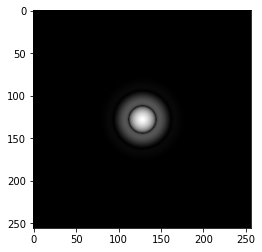

In [5]:
## display magnitude spectrum of filter
f = np.fft.fft2(filt_dft[0])
fshift = np.fft.fftshift(f)
ms1 = 20*np.log(np.abs(fshift)+1)
plt.imshow(ms1,cmap="gray")

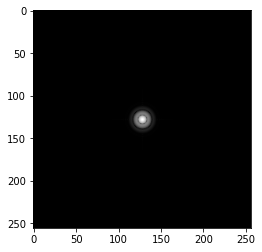

In [6]:
## display magnitude spectrum of filter
f = np.fft.fft2(filt_dft[1])
fshift = np.fft.fftshift(f)
ms1 = 20*np.log(np.abs(fshift)+1)
plt.imshow(ms1,cmap="gray")

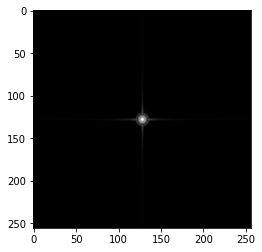

In [7]:
## display magnitude spectrum of filter
f = np.fft.fft2(filt_dft[2])
fshift = np.fft.fftshift(f)
ms1 = 20*np.log(np.abs(fshift)+1)
plt.imshow(ms1,cmap="gray")

## Q3 Convolution using DFT

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def get_box_filter(n):
    
    return np.ones((n,n))/(n*n)

def pad_img(image, new_size):
    
    one_side_pad = (new_size-image.shape[0])

    new_image = cv2.copyMakeBorder(image,0,one_side_pad,0,one_side_pad,cv2.BORDER_CONSTANT,None,value=0)
    
    return new_image


def pad_filter(filt, new_size):
    
    one_side_pad = (new_size-filt.shape[0])

    new_filt = cv2.copyMakeBorder(filt,0,one_side_pad,0,one_side_pad,cv2.BORDER_CONSTANT,None,value=0)
    
    return new_filt

In [9]:
path = "/home/hardeekh/Desktop/IIIT/Semester 5 (Monsoon 2021)/DIP/A-3/"
name="x5.bmp"

img = cv2.imread(path+name,0)
filt = get_box_filter(9)

## zero pad
new_size = img.shape[0]+filt.shape[0]-1
padded_img = pad_img(img,new_size)
padded_filt = pad_filter(filt,new_size)

## compute 2d DFT
img_dft = np.fft.fft2(padded_img)
filt_dft = np.fft.fft2(padded_filt)

## multiply elementwise
mult_res = np.multiply(img_dft,filt_dft)

## take real part of IDFT
conv_via_dft = np.real(np.fft.ifft2(mult_res))

## using inbuilt convolution
conv_inbuilt = signal.convolve2d(img,filt)

In [10]:
conv_via_dft.min(), conv_via_dft.max()

(1.3703703703703818, 220.679012345679)

In [11]:
## display images

cv2.imwrite("conv_via_dft.bmp",conv_via_dft)
cv2.imwrite("conv_inbuilt.bmp",conv_inbuilt)

i=cv2.imread(path+"conv_via_dft.bmp",0)
e=cv2.imread(path+"conv_inbuilt.bmp",0)

cv2.imshow("conv_via_dft",i)
cv2.imshow("conv_inbuilt",e)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Q4 Denoising

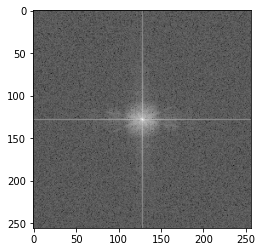

In [16]:
path1 = "/home/hardeekh/Desktop/IIIT/Semester 5 (Monsoon 2021)/DIP/A-4/"
path2 = "/home/hardeekh/Desktop/IIIT/Semester 5 (Monsoon 2021)/DIP/A-4/"

name1="noiseIm.jpg"
name2="x5.bmp"
img1 = cv2.imread(path1+name1,0)
img2 = cv2.imread(path2+name2,0)

## display centred magnitude spectrum of noisy image
f = np.fft.fft2(img1)
fshift = np.fft.fftshift(f)
ms1 = 20*np.log(np.abs(fshift)+1)
plt.imshow(ms1,cmap="gray")

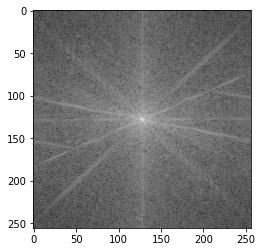

In [11]:
## display centred magnitude spectrum of noisy image
f = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
ms2 = 20*np.log(np.abs(fshift)+1)
plt.imshow(ms2,cmap="gray")

array([[-21.03726618, -15.12645457, -28.71655131, ..., -18.46700133,
        -28.71655131, -15.12645457],
       [ -1.52097708,  -8.85460741,   6.56641889, ..., -24.51696654,
         -6.92235354, -16.09354994],
       [-33.29695293,  12.0092278 , -19.48437207, ...,  -4.04401789,
        -41.01903919, -15.01699677],
       ...,
       [-17.41764951,  -6.58380163, -14.45151141, ...,   7.33551432,
         -6.98347942,   9.87414554],
       [-33.29695293, -15.01699677, -41.01903919, ...,  10.79966686,
        -19.48437207,  12.0092278 ],
       [ -1.52097708, -16.09354994,  -6.92235354, ..., -29.01415212,
          6.56641889,  -8.85460741]])

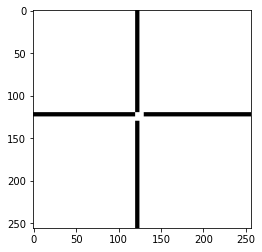

In [20]:
N = img1.shape[0] 
M = img1.shape[1]

## create filter
f = np.ones((256,256))

f[120:125,:120]=0
f[120:125,130:]=0

f[:120,120:125]=0
f[130:,120:125]=0
#f[96,96]=0
#f[160,160]=0
plt.imshow(f,cmap="gray")

new_size = 2*N
padded_img = img1
padded_filt = f

## compute 2d DFT
img_dft = np.fft.fftshift(np.fft.fft2(padded_img))
filt_dft = (padded_filt)

## multiply elementwise
mult_res = np.multiply(img_dft,filt_dft)

## take real part of IDFT
conv_via_dft = np.real(np.fft.ifft2(np.fft.ifftshift(mult_res)))

In [21]:
## display images
cv2.imwrite("noisy.bmp",img1)
cv2.imwrite("denoise_given.bmp",img2)
cv2.imwrite("denoise_calculated.bmp",conv_via_dft)

i=cv2.imread(path+"denoise_given.bmp",0)
e=cv2.imread(path+"denoise_calculated.bmp",0)
s=cv2.imread(path+"noisy.bmp",0)

cv2.imshow("noisy",s)
cv2.imshow("denoise_given",i)
cv2.imshow("denoise_calculated",e)
cv2.waitKey(0)
cv2.destroyAllWindows()